Martin Liang<br>
CST 2312<br>
Project proposal<br>
5/20/2021<br>

<center> 
    <b>Individual Project</b><br> 
    <a href = "https://opendata.cityofnewyork.us/" 
       target = 'blank'>
    <img src = "https://opendata.cityofnewyork.us/wp-content/themes/opendata-wp/assets/img/nyc-open-data-logo.svg" 
         width = "50%"></a>
</center>

I'll be using Data collected by <a href = "https://opendata.cityofnewyork.us/data/" target = 'blank'>NYC Open Data </a>.<br> In this study, I will be 'playing with' / analyzing <code>Housing & Development</code> who's <a href = "https://data.cityofnewyork.us/Housing-Development/Housing-New-York-Units-by-Building/hg8x-zxpr" target = 'blank'>"Housing New York Units by Building"</a>

API link <code>https://data.cityofnewyork.us/resource/hg8x-zxpr.csv</code>.  We will be downloading the file as a '.CSV' <code>housingNYC.csv</code>
into the local directory. We will be saving the file as <code>completeHousing.csv</code>

<b>Important</b><br>
However, If we're using the API link, only 1000 rows will be provide. Thus, I will be using <code>! curl https://data.cityofnewyork.us/api/views/hg8x-zxpr/rows.csv?accessType=DOWNLOAD</code> directly from the Export Feature from NYC OpenData that has the shape (5053, 41)


The data is about:<br>
The Department of Housing Preservation and Development (HPD) reports on buildings, units, and projects that began <b>after January 1, 2014 </b> and are counted towards the Housing New York plan. The Housing New York Units by Building file presents this data by building, and includes building-level data, such as house number, street name, BBL, and BIN for each building in a project. The unit counts are provided by building. For additional documentation, including a data dictionary, review the attachments in the “About this Dataset” section of the Primer landing page.


In [1]:
!curl https://data.cityofnewyork.us/api/views/hg8x-zxpr/rows.csv?accessType=DOWNLOAD -o completeHousing.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 97441    0 97441    0     0  83425      0 --:--:--  0:00:01 --:--:-- 83354
100 1153k    0 1153k    0     0   714k      0 --:--:--  0:00:01 --:--:--  714k


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
nycDf = pd.read_csv('completeHousing.csv')

As you can see, I will have three or more different data types <code> int64, object('string'), float64, and dates.

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
nycDf.shape

(5053, 41)

Explaination:<br>

I have decided to use this set of data to show the broad understanding of NYC's city planning.  I am also interested in where the lower_income_units are concentrated and in which District/Borough they are in. On the other hand, I would like to know where the middle income bracket is located and which District and Borough they are in. As a person who enjoys Real Estate, I find this Dataset helpful with which areas have Higer Value than others. And a helpful tool to find the 'up and coming' areas.


Questions: 
<ol>
    <li> Number of Project per year (w/line plot)
    <li> Top 5 Projects with the most <b>extremly_low_income_units</b> w/ building number, address, borough and council district
    <li> Top 5 Projects with the most <b>very_low_income_units</b> w/ building number, address, borough and council district
    <li> Top 5 Projects with the most <b>low_income_units</b> w/ building number, address, borough and council district
    <li> Total Sum Of New Construction (2014-2021) for Extreme Low Income Units, Very Low Income Units, and Low Income Units by Bourough and Council District
    <li> Top 5 Projects with the most <b>Moderate Income Units</b>. w/ building number, address, borough and council district
    <li> Top 5 Projects with the most <b>Middle Income Units</b>. w/ building number, address, borough and council district
    <li> Top 5 Projects with the most <b>Other Income Units</b>. w/ building number, address, borough and council district
    <li> Total Sum of each New Construction (2014-2021) for Moderate, Middle, and Other Incomes
    <li> Ratio of sum(extrem, very_low, low_income) vs sum(moderate, middle,other)
    <li> Total Number of Preservations in New York City, and of New Construction in the City.
    <li> Which area shows the most low-income units, vs area with the least low_income_units. <br>
        
</ol>


After completing this project, i hope people will see the broad picture of NYC's City Planning, income distribution, and which areas have the most and least amout of low_income to middle_higher_income units, and which districts have the most middle_high_income to low_income projects.

<center><img src = "https://www1.nyc.gov/assets/hpd/images/content/pages/affordable-housing-income-eligibility-2021.jpg" width = "80%"></center>


### Lets get started

<b>Problem 1)</b><br> Lets first take a look at how many Projects will start in each year.

In [6]:
nycDf['Project Start Date'] = pd.to_datetime(nycDf['Project Start Date'])

In [7]:
project_by_year = nycDf['Project Start Date'].dt.year
nycDf['Year'] = project_by_year

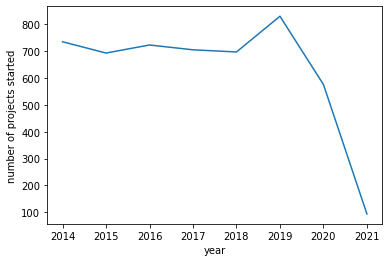

In [8]:
byYearGraph = nycDf['Year'].value_counts().sort_index().plot(xlabel = "year", ylabel = "number of projects started")

Note: As we can see, there is a sideways movemeint of number of projects started from 2014 to 2018. A steady increase from 2018-2019 and a major decline in 2020 to 2021. 

In [9]:
totalUnitsBuilt = (sum(nycDf["Total Units"]))
print(f"The total protential units outputted from 2014-2021 in NYC is: {totalUnitsBuilt:,} units")

The total protential units outputted from 2014-2021 in NYC is: 227,746 units


<b>Problem 2)</b><br> Top 5 Projects with the most <b>extremly_low_income_units</b> w/ building number, borough and council district

In [10]:
extremeLowIncomeDf = pd.DataFrame(nycDf, columns=["Extremely Low Income Units","Number", "Street", "Borough","Council District"])
topFiveDf1 = extremeLowIncomeDf.nlargest(columns='Extremely Low Income Units', n = 5)
print(f"Projects with the most 'Extreme Low Income Units':\n\n{topFiveDf1}")

Projects with the most 'Extreme Low Income Units':

      Extremely Low Income Units Number           Street        Borough  \
4393                         429     85   HOLLAND AVENUE  Staten Island   
225                          314     90     SANDS STREET       Brooklyn   
1534                         250   3528   MERMAID AVENUE       Brooklyn   
1993                         247   3000  BRONX PARK EAST          Bronx   
1882                         241    222   EAST 93 STREET      Manhattan   

      Council District  
4393              49.0  
225               33.0  
1534              47.0  
1993              15.0  
1882               5.0  


<b>Problem 3)</b><br> Top 5 Projects with the most <b>very_low_income_units</b> w/ building number, address, postal code, borough and council district 

In [11]:
veryLowIncomeDf = pd.DataFrame(nycDf, columns=["Very Low Income Units","Number", "Street", "Borough","Council District"])
VeryLowTopFiveDf1 = veryLowIncomeDf.nlargest(columns='Very Low Income Units', n = 5)
print(f"Projects with the most 'Very Low Income Units':\n\n{VeryLowTopFiveDf1}")

Projects with the most 'Very Low Income Units':

     Very Low Income Units Number            Street    Borough  \
950                    352   2070          1 AVENUE  Manhattan   
952                    327   2090          1 AVENUE  Manhattan   
154                    326    333  LAFAYETTE AVENUE   Brooklyn   
953                    326   2116          1 AVENUE  Manhattan   
951                    310    420   EAST 111 STREET  Manhattan   

     Council District  
950               8.0  
952               8.0  
154              35.0  
953               8.0  
951               8.0  


<b>Problem 4)</b><br>Top 5 Projects with the most <b>low_income_units</b> w/ building number, address, postal code, borough and council district

In [12]:
lowIncomeDf = pd.DataFrame(nycDf, columns=["Low Income Units", "Number", "Street", "Borough","Council District"])
lowTopFiveDf1 = lowIncomeDf.nlargest(columns='Low Income Units', n = 5)

print(f"Projects with the most 'Low Income Units':\n\n{lowTopFiveDf1}")

Projects with the most 'Low Income Units':

      Low Income Units  Number                      Street    Borough  \
4767               536    2010            VALENTINE AVENUE      Bronx   
2719               492     255             EAST 149 STREET      Bronx   
2232               454      20  WEST MOSHOLU PARKWAY SOUTH      Bronx   
2264               454  11-Jul              SEAGIRT AVENUE     Queens   
3137               415      10              EAST 28 STREET  Manhattan   

      Council District  
4767              15.0  
2719              17.0  
2232              11.0  
2264              31.0  
3137               2.0  


<b>Problem 5)</b></br> Total Sum Of New Construction (2014-2021) for Extreme, Low , Very Low Income Units, by Bourough

In [13]:
num_of_total_units = nycDf["Extremely Low Income Units"] + nycDf["Very Low Income Units"] + nycDf["Low Income Units"]
nycDf["Total All Low Income"] = num_of_total_units

total_count = pd.pivot_table(nycDf, 
                             values = ["Extremely Low Income Units","Very Low Income Units","Low Income Units"],
                             index = ["Borough"],
                             aggfunc="sum", 
                             margins = True,
                             margins_name="Total Sum")
total_count

,Extremely Low Income Units,Low Income Units,Very Low Income Units
Borough,,,
Bronx,10755,27384,22017
Brooklyn,7037,22171,10971
Manhattan,7922,14016,12757
Queens,2383,6185,3612
Staten Island,953,1184,278
Total Sum,29050,70940,49635


<AxesSubplot:xlabel='Borough'>

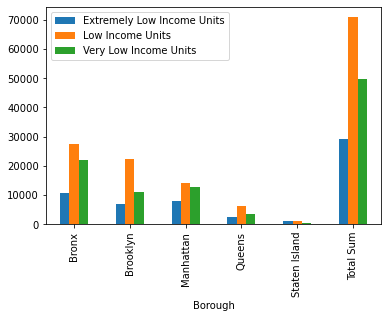

In [14]:
total_count.plot(kind = "bar")

In [15]:
lowTotalSum = sum((nycDf["Extremely Low Income Units"] + nycDf["Very Low Income Units"]+ nycDf["Low Income Units"]))
print(f"Total New Construction of Extreme, Very, and Low Income Housing from (2014-2021): {lowTotalSum:,} units")

Total New Construction of Extreme, Very, and Low Income Housing from (2014-2021): 149,625 units


<AxesSubplot:xlabel='Borough,Council District'>

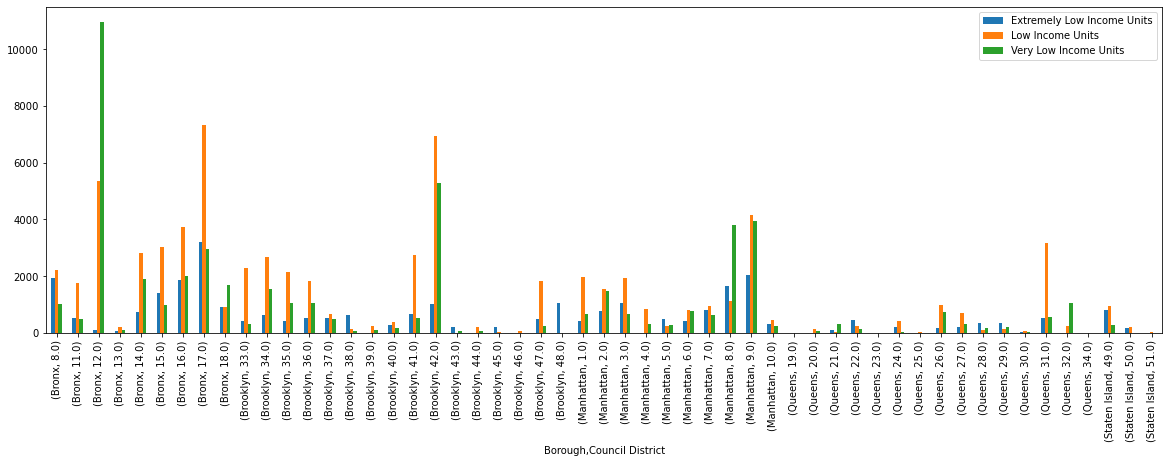

In [16]:
total_count_district = pd.pivot_table(nycDf, 
                             values = ["Extremely Low Income Units","Very Low Income Units","Low Income Units"],
                             index = ["Borough", 'Council District'],
                             aggfunc="sum")
total_count_district.plot(kind = "bar", figsize = (20,6))

<b>Problem 6)</b> Top 5 Projects with the most <b>Moderate Income</b> Units. w/ building number, address, postal code, borough and council district

In [17]:
modToHigherIncomeDf = pd.DataFrame(nycDf, columns=["Moderate Income Units", "Number", "Street", "Borough","Council District"])
modToHighTopFiveDf1 = modToHigherIncomeDf.nlargest(columns='Moderate Income Units', n = 5)

print(f"Projects with the most 'Moderate Income Units':\n\n{modToHighTopFiveDf1}")

Projects with the most 'Moderate Income Units':

      Moderate Income Units  Number                 Street    Borough  \
2264                    454  11-Jul         SEAGIRT AVENUE     Queens   
3592                    358     233  THOMAS BOYLAND STREET   Brooklyn   
3593                    358     214        ROCKAWAY AVENUE   Brooklyn   
4141                    297    2289               5 AVENUE  Manhattan   
826                     228    1982       LEXINGTON AVENUE  Manhattan   

      Council District  
2264              31.0  
3592              41.0  
3593              41.0  
4141               9.0  
826                9.0  


<b>Problem 7)</b> Top 5 Projects with the most <b>Middle Income</b> Units. w/ building number, address, postal code, borough and council district

In [18]:
midToHigherIncomeDf = pd.DataFrame(nycDf, columns=["Middle Income Units", "Number", "Street", "Borough","Council District"])
midToHighTopFiveDf1 = midToHigherIncomeDf.nlargest(columns='Middle Income Units', n = 5)

print(f"Projects with the most 'Mid Income Units':\n\n{midToHighTopFiveDf1}")

Projects with the most 'Mid Income Units':

      Middle Income Units  Number           Street   Borough  Council District
2970                  448  147-40    ARCHER AVENUE    Queens              27.0
4768                  422      79     CLARK STREET  Brooklyn              33.0
2986                  352    3400      PAUL AVENUE     Bronx              11.0
4584                  343     353  BEACH 57 STREET    Queens              31.0
45                    337   22-44   JACKSON AVENUE    Queens              26.0


<b>Problem 8)</b>Top 5 Projects with the most <b>Other Income</b> Units. w/ building number, address, postal code, borough and council district

In [19]:
numOfTotalMidUnits = nycDf["Moderate Income Units"] + nycDf["Middle Income Units"] + nycDf["Other Income Units"]

nycDf["Total All Mid Income"] = numOfTotalMidUnits

midTotalCount = pd.pivot_table(nycDf, 
                             values = ["Moderate Income Units","Middle Income Units","Other Income Units"],
                             index = ["Borough"],
                             aggfunc="sum", 
                             margins = True,
                             margins_name="Total Sum")
midTotalCount

,Middle Income Units,Moderate Income Units,Other Income Units
Borough,,,
Bronx,1114,2262,346
Brooklyn,4876,2559,208
Manhattan,8453,4436,195
Queens,2956,2203,47
Staten Island,37,49,9
Total Sum,17436,11509,805


<AxesSubplot:xlabel='Borough'>

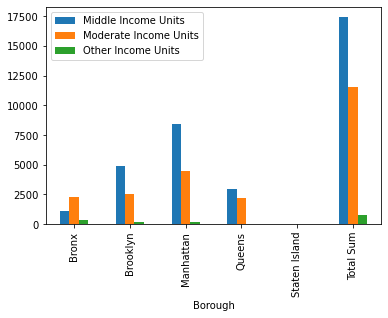

In [20]:
midTotalCount.plot(kind = "bar")

In [21]:
midTotalSum = sum((nycDf["Moderate Income Units"] + nycDf["Middle Income Units"]+ nycDf["Other Income Units"]))
print(f"Total New Construction of Moderate, Middle, and Other Income Housing from (2014-2021): {midTotalSum:,} units")

Total New Construction of Moderate, Middle, and Other Income Housing from (2014-2021): 29,750 units


<AxesSubplot:xlabel='Borough,Council District'>

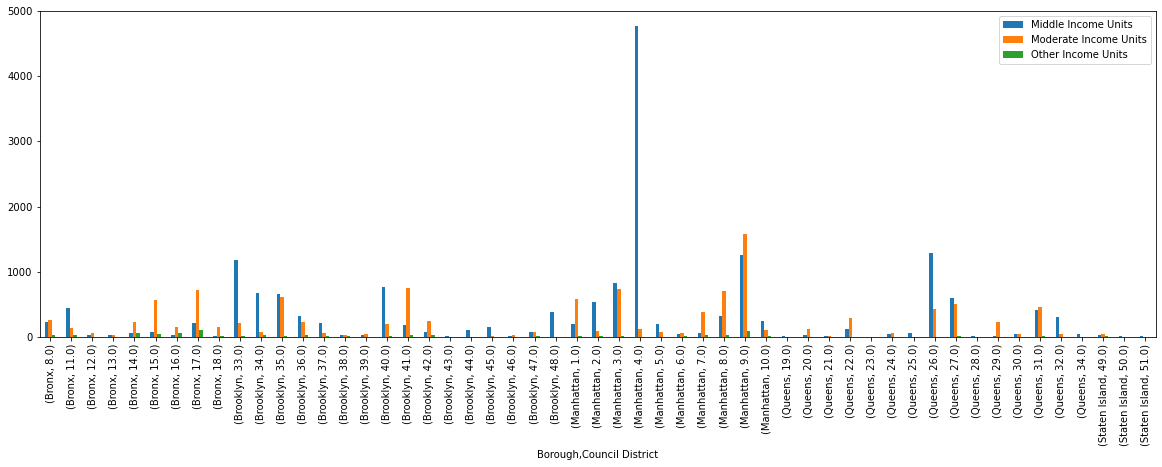

In [22]:
midTotalCountDistrict = pd.pivot_table(nycDf, 
                             values = ["Moderate Income Units","Middle Income Units","Other Income Units"],
                             index = ["Borough", 'Council District'],
                             aggfunc="sum")
midTotalCountDistrict.plot(kind = "bar", figsize = (20,6))

<b>Problem 10)</b> Ratio of sum(extrem, very_low, low_income) vs sum(moderate, middle,other)

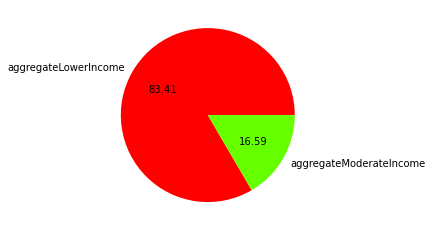

In [24]:
aggregateLowerIncome = sum(nycDf["Extremely Low Income Units"] + nycDf["Very Low Income Units"] + nycDf["Low Income Units"])
aggregateModerateIncome = sum(nycDf["Moderate Income Units"] + nycDf["Middle Income Units"] + nycDf["Other Income Units"])

incomeLabels = ["aggregateLowerIncome", "aggregateModerateIncome"]
incomeColors = ['#ff0000','#66ff00']

plt.pie([aggregateLowerIncome,aggregateModerateIncome], labels=incomeLabels, colors = incomeColors, autopct = '%.2f')
plt.show()


<b>Problem 11)</b> Total Number of Preservations in New York City, and of New Construction in the City.

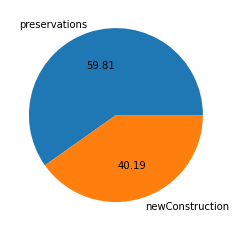

In [25]:
preservations = nycDf.loc[nycDf["Reporting Construction Type"] == "Preservation"].count()[0]
newConstruction = nycDf.loc[nycDf["Reporting Construction Type"] == "New Construction"].count()[0]

constLabels = ['preservations', 'newConstruction']


plt.pie([preservations,newConstruction], labels = constLabels, autopct= "%.2f" )
plt.show()

<b>Problem: 12) Conclusion:</b> Which area shows the most low-income units, vs area with the least low_income_units?<br><br>
The Bronx 12th and 17th Council District has the most Extreme, Very, and Low Income Units<br>
Manhattan 4th and 8th Council District has the most Moderate, Middle, and Other Income Units <br>

I hope this data provides people adequate knowledge of where the highest concentration of newly developed income zones are around the NYC area.<br>
This data can help people find areas based off their income levels, or future real estate preperation<br>